In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

# 1. Introduction

### Milestone 1

Nama  : Khalif Prabowo Santoso

Batch : Pondok Indah - 029

Program ini dibuat untuk mengukur kemampuan data analyst, dimulai dari mencari dataset, mendifinisikan masalahnya, dilanjutkan pengolahan data, serta memberikan kesimpulan atau masukkan, dan yang paling terakhir adalah memvisualisasikannya kedalam dashboard tableau. Dengan ini diharapkan agar mampu menghasilkan sebuah outcome dengan ilmu data analyst.

Link Tableau : https://public.tableau.com/app/profile/ivan.12/viz/Milestone1_17502565662790/SuplementStoreDashboard

# 2. Problem Statement and Dataset Description

### Topik Permasalahan

***SMART***

**Specific**: Improving profitability by optimizing discount strategies and focusing on best-selling supplement categories across countries and platforms.

**Measurable**: Increase revenue per unit sold by 10% through more efficient discount strategies.

**Achievable**: By limiting excessive discounts, promoting high-demand and high-margin supplements, training staff in pricing strategy, and enhancing customer experience across platforms.

**Relevant**: Optimizing discounts strategies and product focus can directly improve profitability and reduce product returns, supporting sustainable growth.

**Time-Bound**: Achieve within the next quarter.

### Problem Statement

Toko Suplemen A menghadapi tantangan dalam meningkatkan profitabilitas akibat strategi diskon yang kurang optimal dan tingginya tingkat pengembalian produk. Untuk mengatasi hal ini, mereka ingin mengoptimalkan skema diskon, fokus pada suplemen dengan permintaan dan margin tinggi, serta meningkatkan pengalaman pelanggan di berbagai platform. Targetnya adalah meningkatkan revenue per unit sebesar 10% dan menurunkan tingkat return sebesar 15% dalam satu kuartal, guna mendorong pertumbuhan bisnis yang lebih berkelanjutan.

### Latar Belakang

Manajemen Toko Suplemen A ingin mengevaluasi efektivitas strategi penjualan mereka setelah melihat indikasi penurunan revenue yang disebabkan oleh diskon berlebihan (over-discounting) dan tingginya tingkat pengembalian produk. Mereka membutuhkan bantuan seorang analis untuk mengidentifikasi produk, kategori, atau strategi diskon yang tidak efektif, serta merumuskan langkah-langkah yang dapat meningkatkan profit dan menekan kerugian akibat pengembalian barang.

### Sumber Dataset

Sumber Dataset : https://www.kaggle.com/datasets/zahidmughal2343/supplement-sales-data

Dataset langsung di download dan dimasukkan kedalam folder milestone1 yang bernama 'suplement_store_sales.csv'

Dataset ini adalah data tentang penjualan suatu toko suplement.

### Penjabaran Masalah

Main Problem: meningkatkan efektivitas startegi penjualan guna memperbesar revenue toko.

Penjabaran Masalah:
1. Apa Saja Produk Yang Paling Sering Diberi Diskon Tinggi Namun Tidak Revenue Yang Signifikan? 
2. Category Terlaris Di Setiap Location? 
3. Kapan periode paling sering terjadi over-discounting dan tingginya return? 
4. Apakah terdapat perbedaan signifikan rata-rata profit antar platform penjualan yang berbeda? 
5. Produk atau kategori apa yang memiliki tingkat pengembalian tertinggi? 
6. Di wilayah atau platform mana pengembalian produk paling sering terjadi? 

Untuk memudahkan analisis dan menyelesaikan masalah, saya menggunakan kerangka kerja dengan startegi penjabaran 5W + 1H untuk dapat menemukan sumber/potensi masalah yang berpengaruh dalah peningkatan strategi.


# 3. Data Loading

In [3]:
df = pd.read_csv('P0M1_Khalif_Santoso_Dataset.csv')
df

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb
...,...,...,...,...,...,...,...,...,...,...
4379,2025-03-31,Melatonin,Sleep Aid,160,47.79,7646.40,0.21,1,USA,iHerb
4380,2025-03-31,Biotin,Vitamin,154,38.12,5870.48,0.22,1,UK,Walmart
4381,2025-03-31,Green Tea Extract,Fat Burner,139,20.40,2835.60,0.12,3,USA,iHerb
4382,2025-03-31,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon


In [7]:
df.sample(5)

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
1848,2022-03-21,Collagen Peptides,Protein,162,32.53,5269.86,0.11,1,Canada,Amazon
1400,2021-09-06,Collagen Peptides,Protein,147,58.08,8537.76,0.13,2,Canada,Amazon
3207,2023-11-06,Zinc,Mineral,163,42.13,6867.19,0.22,2,Canada,iHerb
4038,2024-11-04,Creatine,Performance,152,16.61,2524.72,0.02,0,Canada,Walmart
1382,2021-08-30,Creatine,Performance,135,58.80,7938.00,0.06,1,Canada,iHerb


In [7]:
df['Category'].unique()

array(['Protein', 'Vitamin', 'Omega', 'Performance', 'Amino Acid',
       'Mineral', 'Herbal', 'Sleep Aid', 'Fat Burner', 'Hydration'],
      dtype=object)

> Hasil Load Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


> Pada tabel ini menunjukkan informasi dari dataset terkait. Bisa melihat jumlah datanya, typedata-nya, dan jumlah masing-masing type data-nya.

In [4]:
df.columns

Index(['Date', 'Product Name', 'Category', 'Units Sold', 'Price', 'Revenue',
       'Discount', 'Units Returned', 'Location', 'Platform'],
      dtype='object')

> Load nama-nama columns yang ada didalam dataset.

In [5]:
df.nunique()

Date               274
Product Name        16
Category            10
Units Sold          81
Price             2919
Revenue           4326
Discount            26
Units Returned       9
Location             3
Platform             3
dtype: int64

> Menunjukkan jumlah nilai Unique dari setiap columns, contoh: Platform Dan Location Hanya ada 3 Unique dari Total 4383 row (Iherb, Amazon, Walmart).

# 4. Data Cleaning

In [6]:
df.isna().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

> Berdasar pada code diatas untuk mencari 'NULL' values, terlihat bahwa dataset ini sudah clean (tidak ada 'NULL' values).

In [7]:
df.duplicated().sum()

np.int64(0)

> Berdasar pada code diatas untuk mencari duplicate row, terlihat bahwa dataset ini sudah clean (tidak ada duplicate row).

In [8]:
df.dtypes

Date               object
Product Name       object
Category           object
Units Sold          int64
Price             float64
Revenue           float64
Discount          float64
Units Returned      int64
Location           object
Platform           object
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

> Type data pada dataset sudah sesuai, hanya ada pada 1 kolom yaitu date, yang datanya masih berupa object (bukan datetime), maka akan dilakukan pengubahan type data untuk memudahkan apabila data yang membutuhkan mengambil secara datetime.

In [10]:
df.dtypes

Date              datetime64[ns]
Product Name              object
Category                  object
Units Sold                 int64
Price                    float64
Revenue                  float64
Discount                 float64
Units Returned             int64
Location                  object
Platform                  object
dtype: object

> Hasil Akhir data type dan kurang lebihnya sudah cukup sesuai.

# 5. Exploration and Analysis

### I. Apa Saja Produk Yang Paling Sering Diberi Diskon Tinggi Namun Revenue Tidak Signifikan? Deskriptif

#### Step Pengerjaan
1. Memberikan data per-product terkait rata-rata discountnya (hal ini digunakan karena discount per-produknya bisa bervariasi).
2. Memberikan data per-product terkait jumlah revenue per-product yang dihasilkan.
3. Memasukkan kedalam variabel untuk memudahkan pencarian.
4. Definisikan berapa nilai diskon yang dianggap tinggi. Dengan menggunakan pendekatan statistik dan prinsip data-driven, penggunaan tinggi dalam sebuah data dapat dicari dengan menggunakan 25% data teratas atau Q3 (50% data tengah atau median Q2, 25% data terbawah/nilai terbawah Q1).
5. Definisikan revenue yang tidak signifikan, kita akan mengambil median / Q2 dari revenue untuk mencari revenue tidak signifikan, alasannya adalah agar data yang dihasilkan dapat memberikan hasil yang lebih umum (Tidak terburuk/Q1).
6. Lakukan filterisasi harga sehingga data yang ditampilkan adalah harga yang dapat menjawab pertanyaan (diskon diatas q3/batas dan revenue 
dibawah q2/median). 
7. Memperlihatkan data yang tergolong diberi diskon tetapi revenue tidak signifikan.
8. Visualisasi dari keseluruhan data dengan menghighlight produk yang sering diberi diskon tetapi revenue tidak signifikan.

In [6]:
produk = df.groupby('Product Name').agg({'Discount': 'mean','Revenue': 'sum'}).reset_index()
produk

,Product Name,Discount,Revenue
0,Ashwagandha,0.126241,1405700.79
1,BCAA,0.121642,1464819.63
2,Biotin,0.121131,1486798.62
3,Collagen Peptides,0.121277,1433297.24
4,Creatine,0.119964,1432518.40
5,Electrolyte Powder,0.119088,1411951.38
6,Fish Oil,0.128905,1451065.87
7,Green Tea Extract,0.125657,1440900.05
8,Iron Supplement,0.122117,1431582.41
9,Magnesium,0.129343,1361978.63


In [7]:
diskon = produk['Discount'].quantile(0.75)
med_revenue = produk['Revenue'].median()

In [10]:
print(f"Nilai Minimal Harga Tinggi: {diskon:.4f}\nBatas Minimal Revenue Tidak Signifikan: {med_revenue:,.0f}")

Nilai Minimal Harga Tinggi: 0.1267
Batas Minimal Revenue Tidak Signifikan: 1,432,050


In [8]:
result = produk[(produk['Discount'] > diskon) & (produk['Revenue'] < med_revenue)]
result

,Product Name,Discount,Revenue
9,Magnesium,0.129343,1361978.63
13,Vitamin C,0.129270,1421998.07


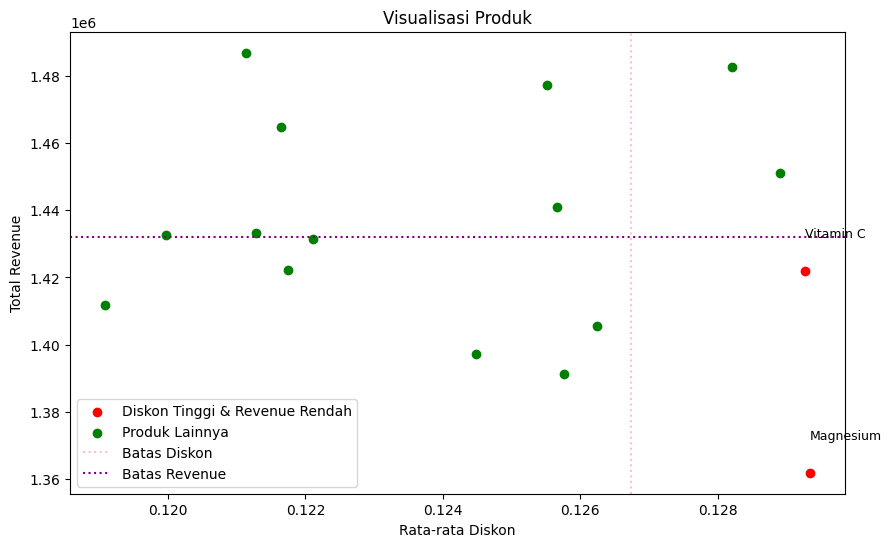

In [14]:
# Ini Untuk Assign Produk Yang Masuk Kriteria
produk['Highlight'] = produk['Product Name'].isin(['Magnesium', 'Vitamin C'])

#Size Untuk Figure (Visualisasi)
plt.figure(figsize=(10, 6))

#Filter Produk Yang Masuk Kriteria Dan Tidak Dan Tipe Plot Scatter
plt.scatter(produk[produk['Highlight']]['Discount'], produk[produk['Highlight']]['Revenue'], color='red', label='Diskon Tinggi & Revenue Rendah')
plt.scatter(produk[~produk['Highlight']]['Discount'], produk[~produk['Highlight']]['Revenue'], color='green', label='Produk Lainnya')

#Horizontal Line Dan Vertikal Line, Diambil Dari Perhitung diskon , med_revenue.
plt.axvline(diskon, color='pink', linestyle = ':',label='Batas Diskon')
plt.axhline(med_revenue, color='purple',  linestyle = ':',label='Batas Revenue')

#Label Axis 
plt.xlabel('Rata-rata Diskon')
plt.ylabel('Total Revenue')
plt.title('Visualisasi Produk')
plt.legend()
plt.show()


#### Insight
Berdasarkan hasil *Central Tendenciesnya* (Mean dan Median) terlihat bahwa pada data suplement store, berdasarkan rata-ratanya sebuah discount dikatakan tinggi apabila berada di angka lebih dari 0.1267 dan berdasarkan nilai tengahnya revenue dikatakan rendah apabila berada di angka kurang dari 1,432,050 USD. sehingga dengan melakukan filter berdasarkan diskon dan median terdapat 2 produk yang memiliki kondisi 'Discount Tinggi Revenue Rendah yaitu Pada :
1. **Magnesium** 
2. **Vitamin C**

### II. Category Terlaris Di Setiap Location? Visualisasi

In [16]:
# Grouping Location, Category Dan Sum Units Sold --> Di Sort Values Descending
loc_category = df.groupby(['Location', 'Category'])['Units Sold'].sum().reset_index()
loc_category = loc_category.sort_values(by='Units Sold', ascending=False)

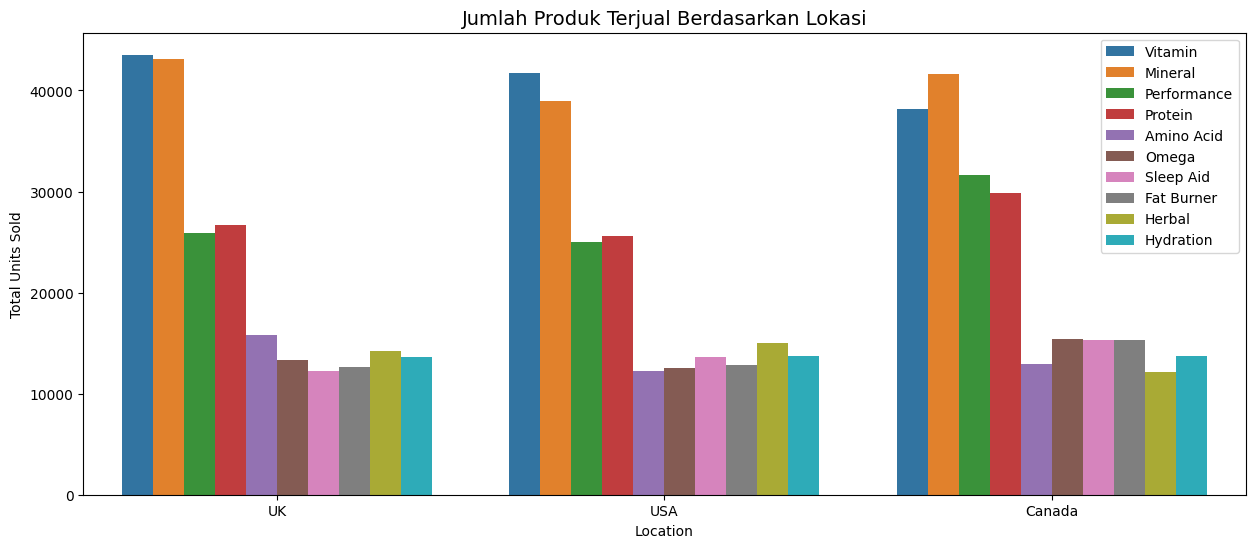

In [17]:
#Size Untuk Figure (Visualisasi)
plt.figure(figsize=(15, 6))

#Type Plot Bar Dan Cara Visualisasi Berdasarkan Axis-nya.
sns.barplot(data=loc_category,x='Location',y='Units Sold',hue='Category')

#Label Axis
plt.title('Jumlah Produk Terjual Berdasarkan Lokasi', fontsize=14)
plt.ylabel('Total Units Sold')
plt.xlabel('Location')
plt.legend()
plt.show()

Berdasarkan hasil visualisasi setelah memisahkan locationnya dan didalamnya terdapat pemisahan berdasarkan category dan menjumlahkan Unit Soldnya. Dapat dilihat bahwa:
**Top 3 Dari 10 Category Berdasarkan Location**

A. UK
1. Vitamin
2. Mineral
3. Protein

B. USA
1. Vitamin
2. Mineral
3. Protein

C. Canada
1. Mineral
2. Vitamin 
3. Performance

### III. Kapan periode paling sering terjadi over-discounting dan tingginya return? Visualisasi


In [29]:
#Untuk Assign Data Secara Quarter
periode = df.groupby(pd.to_datetime(df['Date']).dt.to_period('Q')).agg({
    'Discount': 'mean',
    'Units Returned': 'sum'
}).reset_index()

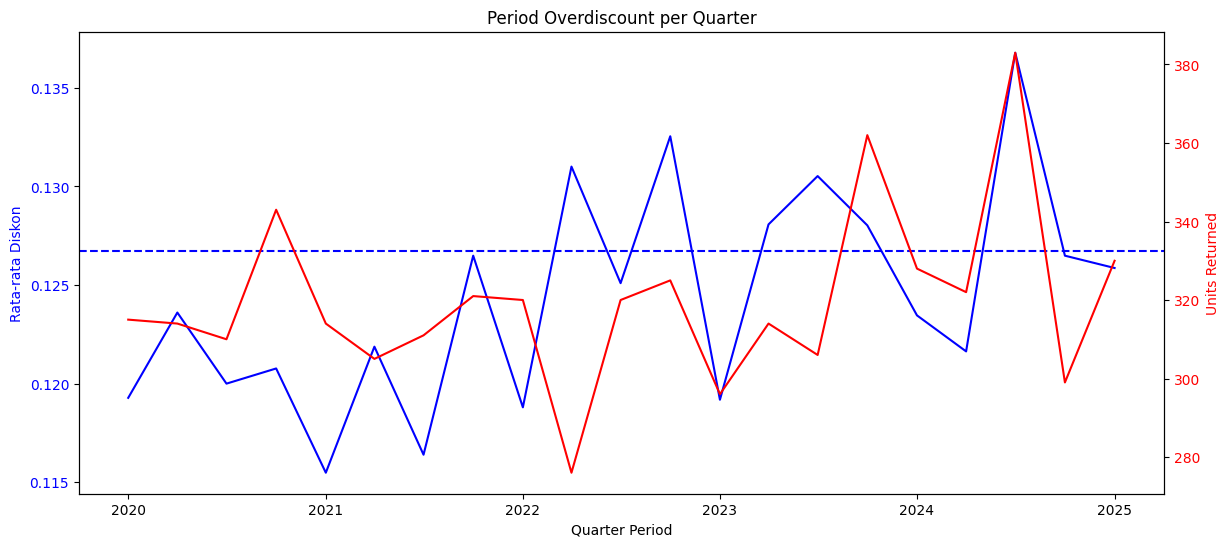

In [30]:
#Jika Tidak To Timestamp Periode Tidak Bisa Muncul (ERROR)
periode['Date'] = periode['Date'].dt.to_timestamp(how = 'start')

#Size Untuk Figure (Visualisasi) + Subplot Untuk Menampilkan Beberapa Visualisasi Dalam Figure Yang Sama
fig, ax1 = plt.subplots(figsize=(14, 6))

#Type Plot Line
sns.lineplot(data=periode, x='Date', y='Discount', ax=ax1, color='blue')
ax1.set_ylabel('Rata-rata Diskon', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Quarter Period')

#Line Horizontal Untuk Batas Diskon Tinggi
ax1.axhline(diskon, color='blue', linestyle='--', linewidth=1.5)

#Type Plot Line - 2
ax2 = ax1.twinx()
sns.lineplot(data=periode, x='Date', y='Units Returned', ax=ax2, color='red')
ax2.set_ylabel('Units Returned', color='red')
ax2.tick_params(axis='y', labelcolor='red')

#Axis Label
plt.title('Period Overdiscount per Quarter')
plt.show()

Berdasarkan hasil visualisasi, Overdiscounting terjadi pada (mengacu pada rata-rata diskon):
1. Q2 dan Q4 2022
2. Q2, Q3, Q4 2023
3. Q3 2024

a. Terlihat bahwa pada periode **Q4 2023** Overdiscounting berpengaruh terhadap Units Returnnya.

b. Terlihat juga bahwa pada periode **Q3 2024** pada saat terjadi overdiscounting, Unit Yang Di Returnnya juga tinggi.

### IV. Apakah terdapat perbedaan signifikan rata-rata profit antar platform penjualan yang berbeda? Inferential

Untuk mencari profit kita bisa melakukan perhitungan yaitu revenue *(Dikalikan) dengan (1 - discountnya),(Contoh 1 - 0.03 -> Revenue akan * dengan 0.97), Lalu kenapa kolomnya bernama estimated_profit karena dengan asumsi semua ini belum dihitung untuk cost-cost lain(Biaya produksi, Biaya Pengantaran, dll).

In [ ]:
df['Estimated_Profit'] = df['Revenue'] * (1 - df['Discount'])
df

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Estimated_Profit
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,4435.9458
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,5672.5344
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,1558.8825
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,2069.8160
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,4176.5925
...,...,...,...,...,...,...,...,...,...,...,...
4379,2025-03-31,Melatonin,Sleep Aid,160,47.79,7646.40,0.21,1,USA,iHerb,6040.6560
4380,2025-03-31,Biotin,Vitamin,154,38.12,5870.48,0.22,1,UK,Walmart,4578.9744
4381,2025-03-31,Green Tea Extract,Fat Burner,139,20.40,2835.60,0.12,3,USA,iHerb,2495.3280
4382,2025-03-31,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon,2171.1998


Setelah mendapat estimasi profitnya kita ingin tau apakah perbedaannya profit antar location itu memiliki perbedaan rata-rata secara signifikan atau tidak. Namun, kita tidak mengetahui diangka berapa sebuah perbandingan itu dapat dikatakan berbeda atau tidak, sehingga kita akan mencari angkanya berdasarkan ilmu statisik. Dan karena perbandingannya ada 3 sample maka pendekatan statistik yang cocok untuk menghitungnya adalah dengan menggunakan penjabaran statistik inferensial **ANOVA**.

##### Penjabaran Statisik Infrensial ANOVA (Analysis of Variance)

Sebelum masuk kedalam perhitungannya kita akan menentukan metricsnya terlebih dahulu yaitu H0 dan H1, dimana apabila nilai perhitungan ANOVA nilainya (P-valuenya) < 0.05 Maka H0 Ditolak Dan H1 Diterima, begitupun sebaliknya.

H0: Rata-rata profit antar platform(iherb,walmart,amazon) tidak terdapat perbedaan signifikan.

H1: Rata-rata profit antar platform(iherb,walmart,amazon) terdapat perbedaan signifikan.

In [ ]:
iherb = df[df['Platform'] == 'iHerb']['Estimated_Profit']
walmart = df[df['Platform'] == 'Walmart']['Estimated_Profit']
amazon = df[df['Platform'] == 'Amazon']['Estimated_Profit']

res = stats.f_oneway(iherb, walmart, amazon)
print('P-value:',res.pvalue)

P-value: 0.9408534232950309


Berdasarkan hasil perhitungannya tertera bahwa P-Value bernilai 0.94. karena nilai p-value > 0.05, yang mana hasilnya adalah **H0 diterima dan H1 ditolak**,berdasar pada kesimpulan dari H0 maka artinya revenue tiap platform tidak terdapat perbeedan yang signifikan.

### V. Produk atau kategori apa yang memiliki tingkat pengembalian tertinggi? Visualisasi

In [ ]:
#Penggunaan Aggregate Untuk Memfilter Category Berdasar Units Returned + Units Sold Yang Sudah Di Sum
kategori_return = df.groupby('Category').agg({
    'Units Returned': 'sum',
    'Units Sold': 'sum'
})

#Penggunaan Aggregate Untuk Memfilter Product Berdasar Units Returned + Units Sold Yang Sudah Di Sum
produk_return = df.groupby('Product Name').agg({
    'Units Returned': 'sum',
    'Units Sold': 'sum'
})

#Membuat Column Return Rate
produk_return['Return_Rate'] = produk_return['Units Returned'] / produk_return['Units Sold']
kategori_return['Return_Rate'] = kategori_return['Units Returned'] / kategori_return['Units Sold']

kategori_return = kategori_return.sort_values('Return_Rate', ascending=False).reset_index().head(5)
produk_return= produk_return.sort_values('Return_Rate', ascending=False).reset_index().head(5)



/var/folders/ct/s2wc2gy11hj_h3hfr7l8v3nh0000gn/T/ipykernel_80278/2216977491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Return_Rate', y='Category', data=kategori_return, palette='BuPu_r', ax = axes[0])
/var/folders/ct/s2wc2gy11hj_h3hfr7l8v3nh0000gn/T/ipykernel_80278/2216977491.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Return_Rate', y='Product Name', data= produk_return, palette='BuPu_r', ax = axes[1])


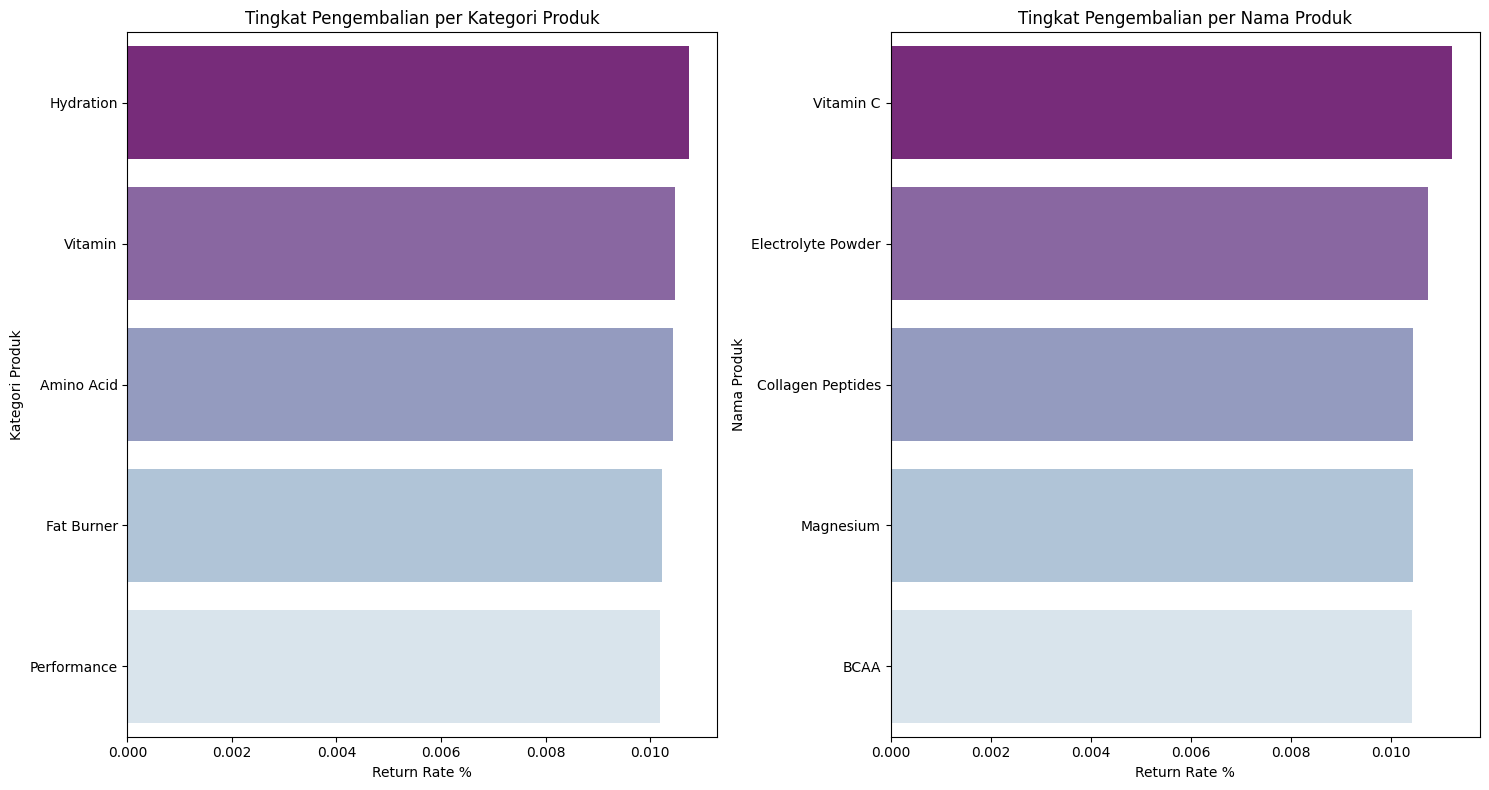

In [ ]:
#Size Untuk Figure (Visualisasi) + Subplot Untuk Menampilkan Beberapa Visualisasi Dalam Figure Yang Sama
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

#Type Plot Bar 
sns.barplot(x='Return_Rate', y='Category', data=kategori_return, palette='BuPu_r', ax = axes[0])
axes[0].set_title('Tingkat Pengembalian per Kategori Produk')
axes[0].set_xlabel('Return Rate %')
axes[0].set_ylabel('Kategori Produk')
axes[0].tick_params(axis='y', labelsize=10)

#Type Plot Bar-2
sns.barplot(x='Return_Rate', y='Product Name', data= produk_return, palette='BuPu_r', ax = axes[1])
axes[1].set_title('Tingkat Pengembalian per Nama Produk')
axes[1].set_xlabel('Return Rate %')
axes[1].set_ylabel('Nama Produk')
axes[1].tick_params(axis='y', labelsize=10)

#Label Axis
plt.tight_layout()
plt.show()

Mengacu pada hasil visualisasi bahwa terlihat produk serta category yang memiliki return rate tinggi. Yaitu, terdapat pada:

a. **Category**
1. Hydration
2. Vitamin
3. Amino
4. Fat Burner
5. Performance

b. **Produk**
1. Vitamin C
2. Electrolyte Powder
3. Collagen Peptides
4. Magnesium
5. BCAA

Ini didapatkan setelah melakukan aggregate SUM pada kolom Units Returned Dan Units Sold, Lalu Menggunakan Perhitungan Ratenya dengan membagi antara Units Returned / Units Sold.

### VI. Di Location Dan Platform Mana Yang Banyak Terjadi Pengembalian Produk? Visualisasi

In [ ]:
#Grouping Untuk Melihat Jumlah Return Pada Setiap Lokasi Dan Platform
location_return = df.groupby('Location')['Units Returned'].sum().sort_values(ascending=False).reset_index()
platform_return = df.groupby('Platform')['Units Returned'].sum().sort_values(ascending=False).reset_index()

/var/folders/ct/s2wc2gy11hj_h3hfr7l8v3nh0000gn/T/ipykernel_80278/2373908976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Units Returned', y='Location', data=location_return, palette='Blues_d', ax = axes[0])
/var/folders/ct/s2wc2gy11hj_h3hfr7l8v3nh0000gn/T/ipykernel_80278/2373908976.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Units Returned', y='Platform', data=platform_return, palette='Reds_d',ax= axes[1])


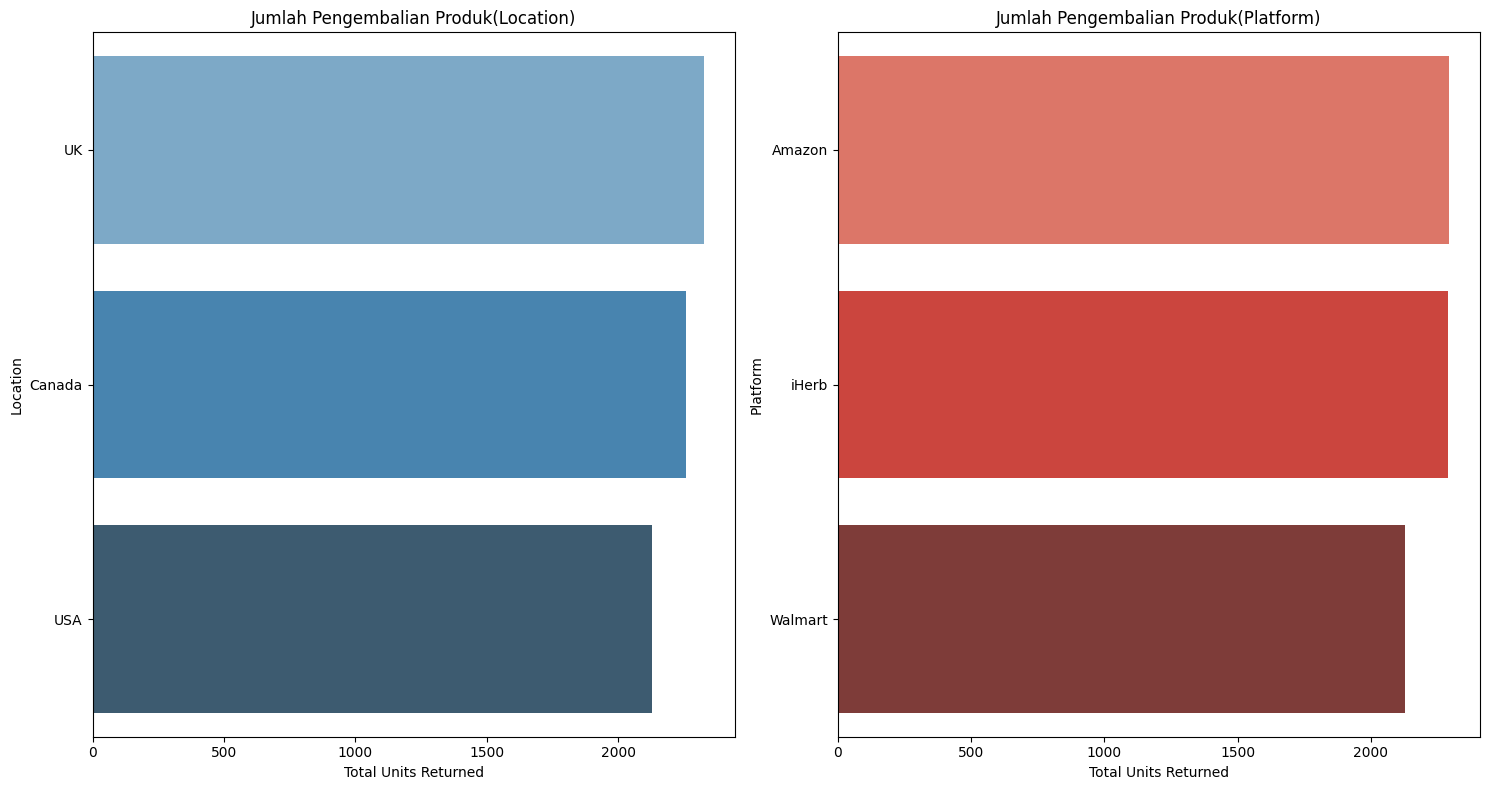

In [ ]:
#Size Untuk Figure (Visualisasi) + Subplot Untuk Menampilkan Beberapa Visualisasi Dalam Figure Yang Sama
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

#Type Bar Plot
sns.barplot(x='Units Returned', y='Location', data=location_return, palette='Blues_d', ax = axes[0])
axes[0].set_title('Jumlah Pengembalian Produk(Location)')
axes[0].set_xlabel('Total Units Returned')
axes[0].set_ylabel('Location')

#Type Bar Plot 2
sns.barplot(x='Units Returned', y='Platform', data=platform_return, palette='Reds_d',ax= axes[1])
axes[1].set_title('Jumlah Pengembalian Produk(Platform)')
axes[1].set_xlabel('Total Units Returned')
axes[1].set_ylabel('Platform')

#Axis Label
plt.tight_layout()
plt.show()

Mengacu pada hasil visualisasi bahwa terlihat lokasi return terbanyak setiap negara dan platform yang hasilnya:

a. **Location**
1. UK
2. Canada
3. USA

b. **Platform**
1. Amazon
2. iHerb
3. Walmart

yang hasilnya didapatkan melalui Sum dari units returned-nya dan di group berdasarkan Lokasi serta Platform.

# 6. Conclusion

1. Apa Saja Produk Yang Paling Sering Diberi Diskon Tinggi Namun Revenue Tidak Signifikan?
--> Berdasar pada hasil bahwa ada 2 dari 15 produk yang masuk kedalam diskon tinggi namun revenue tidak signifikan langkah selanjutnya adalah melakukan analisa terlebih tentang apa yang menyebabkan diskon tinggi tapi revenue tidak signifikan apa mungkin diskon terlalu tinggi sehingga revenue yang didapatkan tidak maksimal

2. Category Terlaris Di Setiap Location
--> Berdasar pada hasil visualisasi category terlaris di setiap lokasinya terlihat bahwa Di UK Ada Vitamin, Di USA Ada Vitamin, Di Canada Ada Mineral. Hasil dari Visualisasi sederhana ini bisa dimanfaatkan untuk lebih memaksimalkan potensi pada produk-produk yang paling laku untuk meningkatkan revenue.

3. Kapan periode paling sering terjadi over-discounting dan tingginya return?
--> Berdasarkan visual data terlihat bahwa pada Tahun 2023 ada di Q4 dan Tahun 2024 di Q3, berdasarkan pada data maka penurunan mulai terjadi di tahun 2023 dan biasa terjadi Mulai di Q3 yaitu bulan Juli dan berakhir di Q4 yaitu bulan Desember. Sehingga perlu ditelusuri lebih lanjut faktor-faktor apa yang menyebabkan pada periode ini terjadi over discounting dan high-return. Berdasarkan asumsi mungkin pada Saat Christmas terjadi over discounting tetapi produk yang di discount memiliki produk yang buruk (bisa di packaging atau isi).

4. Apakah terdapat perbedaan signifikan rata-rata profit antar platform penjualan yang berbeda?
--> Berdasarkan hasil analisa dengan menggunakan ANOVA adalah tidak ada perbedaan signifikan pada rata-rata profit disetiap location. Sehingga revenue bisa dianggap setara yang artinya kita bisa menerapkan strategi penjualan secara menyeluruh dan hasilnya bisa berjalan untuk semuanya karena terlihat bahwa produk terjual mungkin hampir setara setiap locationnya.

5. Produk atau kategori apa yang memiliki tingkat pengembalian tertinggi?
--> Berdasarkan hasil visual terlihat Top 5 pada Category dan Top 5 pada Category yang sering di kembalikan sehingga karena kita sudah mendapatkan category terlaris disetiap location kita bisa menggabungkan kedua info tersebut untuk memfilter, category apa yang terlaris dan category apa yang kurang, untuk nantinya dapat memutuskan Strategi diskon dan juga strategi lainnya.

6. Di Location Dan Platform Mana Yang Banyak Terjadi Pengembalian Produk?
--> Berdasar hasil visualisasi terlihat juga Top 5 pada Location dan Top 5 Platform yang sering dikembalikan informasi ini bisa digabungkan juga dengan poin 2 dan 4 untuk memutuskan Strategi Berikutnya.

Kesimpulan Terakhir : 

Untuk Menjawab SMART yang dijelaskan di Problem Statement maka kita sudah memiliki cukup data sebagai strategi kita. Kita bisa menggunakan poin-poin dari 1-6 untuk menjawab:
1. Spesific 
--> Penggabungan Poin 1 - 6 dapat disatukan dalam kita menentukan strategi diskon, juga untuk meningkatkan profit kita bisa melihat produk-produk paling laris di setiap location ataupun platform. Kita bisa memaksimalkan potensi dari profit dengan berfokus pada produk dengan tingkat penjualan tinggi dan juga kita bisa berbenah pada produk yang returnnya tinggi.

2. Measurable
--> Hasil dari spesifik tersebut kita bisa melakukan pengukuran secara perhitungan dengan memanfaatkan produk unggulan dan membenahi produk buruk untuk meningkatkan profitabilitas sebesar 10% per produk dan menurunkan tingkat return sebesar 15%

3. Achievable
--> Untuk Dapat memenuhi spesifik measurable kita juga harus bisa menentukan strategi yang tepat. Untuk itu diperlukan selain dari produk, kita meningkatkan pelayanannya baik secara langsung maupun pelayanan onlinennya.

4. Relevant
--> Berdasarkan jawaban Spesific, Measurable, Dan Achievable hasil ini akan relevant apabila semuanya dijalankan secara disiplin dan semuanya berjalan secara linier.

5. Time-Bound
--> Keempat Topik permasalahan ini diharapkan dapat selesai dalam waktu 3 bulan atau quarterly dan juga hasilnya pun diharapkan dapat memenuhi poin measurable yaitu kenaikan profit sebesar 10% dan penurunan product return sebesar 15%. dilihat dari visualisasi terkait periode kita menganalisisnya quarterly.
